In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

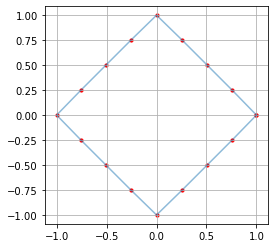

In [2]:
n = 4
div = n * 4
theta = np.linspace(0, 2*np.pi, div+1) #theta = np.arange(0, 2*np.pi, np.pi/div)
F = 30
V = sum([1 / (1 + f * n)**2 * np.exp((1 + f * n) * 1j * theta) for f in range(-F // 2, F // 2)])
V /= sum([1 / (1 + f * n)**2 for f in range(-F // 2, F // 2)])

x = V.real
y = V.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5, )
plt.scatter(x, y, s=10, c='r')

In [3]:
def dft(f):
    N = len(f)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += f[t] * np.exp(-2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y)

def idft(F):
    N = len(F)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += F[t] * np.exp(2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y) / N

TypeError: 'NoneType' object is not subscriptable

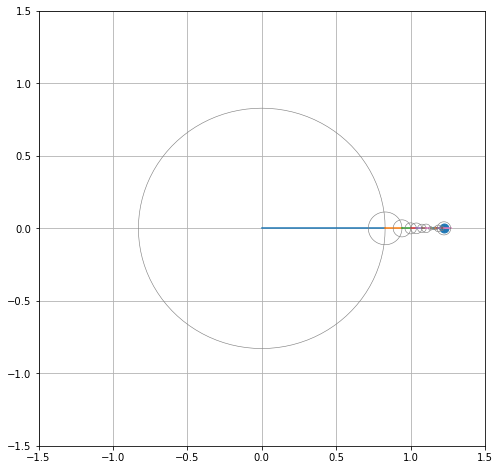

In [4]:
A = dft(V)

def epicycles(f, t):
    ct = np.linspace(0, 2*np.pi, 101)
    f = np.sort(f)[::-1]
    v = 0
    for i in range(len(f)):
        pv = v
        radius = abs(f[i]) / len(f)
        phase = np.angle(f[i])
        v += radius * np.exp(1j * phase * i / len(f)*t) 
        plt.plot([pv.real, v.real], [pv.imag, v.imag])
        
        c = radius * np.exp(1j * ct)
        plt.plot(c.real + pv.real, c.imag + pv.imag, c='gray', lw=0.6)
        #plt.scatter(pv.real, pv.imag, s=20)
        if i == len(f)-1:
            plt.scatter(pv.real, pv.imag, s=80)
    
    
fig = plt.figure(figsize=(8, 8))
plt.grid()
plt.axis([-1.5,1.5,-1.5,1.5], 'equal')
#epicycles(A, 0.5)

ims = []
frames = div
for i in range(frames):
    P = epicycles(A, i/frames)
    ims.append(P[0])

ani = animation.ArtistAnimation(fig, ims, interval=50)
plt.close()
HTML(ani.to_jshtml())


In [ ]:
function epiCycles(x, y, rotation, fourier) {
  for (let i = 0; i < fourier.length; i++) {
    let prevx = x;
    let prevy = y;
    let freq = fourier[i].freq;
    let radius = fourier[i].amp;
    let phase = fourier[i].phase;
    x += radius * cos(freq * time + phase + rotation);
    y += radius * sin(freq * time + phase + rotation);

    stroke(255, 100);
    noFill();
    ellipse(prevx, prevy, radius * 2);
    stroke(255);
    line(prevx, prevy, x, y);
  }
  return createVector(x, y);
}